# Time Series Decomposition

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = 8

In [122]:
sns.set_style(style = 'white')
sns.set(rc = {'figure.figsize': (12,8), 
             'axes.facecolor': 'white',
             'axes.grid': True,'grid.color': '.7',
             'axes.linewidth': 1.0, 
             'grid.linestyle': u'-'}, font_scale = 1.0)
custom_colors = ['#02334a', '#a9bcc6', '#513e5c']
sns.set_palette(custom_colors)

### Daily data from www.ecad.eu  for Soltau, Germany

#### 1. Data for temperature

In [123]:
df_t= pd.read_csv('TG_STAID004652.txt',header = 14,  sep = ',', index_col = 1, parse_dates=True) # timedata to index
df_t.head(3)

,SOUID,TG,Q_TG
DATE,,,
1947-07-21,128916,190,0
1947-07-22,128916,223,0
1947-07-23,128916,243,0


From file:


FILE FORMAT (MISSING VALUE CODE IS -9999):

01-06 **SOUID**: Source identifier

08-15 **DATE** : Date YYYYMMDD

17-21 **TG**: mean temperature in 0.1 &#176;C

23-27 **Q_TG**: Quality code for TG (0='valid'; 1='suspect'; 9='missing')



In [124]:
df_t.describe()

,SOUID,TG,Q_TG
count,26797.0,26797.000000,26797.000000
mean,128916.0,88.529014,0.000448
std,0.0,94.075742,0.055987
min,128916.0,-9999.000000,0.000000
25%,128916.0,37.000000,0.000000
50%,128916.0,91.000000,0.000000
75%,128916.0,144.000000,0.000000
max,128916.0,289.000000,9.000000


In [125]:
inv_t = df_t.loc[df_t[' Q_TG']!=0] # find the invalid data
inv_t

,SOUID,TG,Q_TG
DATE,,,
2002-08-25,128916,-9999,9
2005-03-22,128916,72,1
2005-05-26,128916,216,1
2006-01-24,128916,-75,1


12 points only, can be deleted from the analysis.

#### 2. Data for precipitation

In [126]:
df_p = pd.read_csv('RR_STAID004652.txt', header = 14, sep = ',', index_col = 1, parse_dates=True, na_values=[-9999])# is this file are too much invalid data, I'll fill they

In [127]:
inv_p = df_p.loc[df_p[' Q_RR'] != 0]
inv_p

,SOUID,RR,Q_RR
DATE,,,
1891-05-01,128914,NaN,9
1891-05-02,128914,NaN,9
1891-05-03,128914,NaN,9
1891-05-04,128914,NaN,9
...,...,...,...
2005-01-19,128914,NaN,9
2005-05-26,128914,NaN,9
2005-06-29,128914,NaN,9
2020-06-27,128914,NaN,9


985 invalid data, I'll use previous valid observations to fill NaN.

In [128]:
df_p.fillna(method='bfill', inplace = True)

In [129]:
df_p.loc[df_p[' Q_RR'] != 0] # check of changed data

,SOUID,RR,Q_RR
DATE,,,
1891-05-01,128914,0.0,9
1891-05-02,128914,0.0,9
1891-05-03,128914,0.0,9
1891-05-04,128914,0.0,9
...,...,...,...
2005-01-19,128914,168.0,9
2005-05-26,128914,0.0,9
2005-06-29,128914,74.0,9
2020-06-27,128914,43.0,9


In [130]:
""" Create a new DataFrame with temperature and precipitation"""

df_data = df_t.loc[df_t[' Q_TG'] == 0 ] # select valid rows (0 = 'valid') 
df_data

,SOUID,TG,Q_TG
DATE,,,
1947-07-21,128916,190,0
1947-07-22,128916,223,0
1947-07-23,128916,243,0
1947-07-24,128916,225,0
...,...,...,...
2020-11-27,128916,60,0
2020-11-28,128916,29,0
2020-11-29,128916,17,0
2020-11-30,128916,16,0


In [131]:
df_data['Precipitation'] = df_p['   RR'].loc['1947-07-21':]  # start from the same date
df_data[' Q_RR'] = df_p[' Q_RR'].loc['1947-07-21':]
print(df_data.isna().sum()) # check for NaN

 SOUID           0
   TG            0
 Q_TG            0
Precipitation    0
 Q_RR            0
dtype: int64


/opt/miniconda3/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/miniconda3/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [132]:
df_data['Temperature'] = df_data['   TG']/10     # correct the temperature values



/opt/miniconda3/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 3. Data for  wind speed

17-21 **FG**   : wind speed in 0.1 m/s

In [133]:
df_w = pd.read_csv('FG_STAID004652.txt', header = 14, sep = ',', index_col = 1, parse_dates=True, na_values=[-9999])
inv_w = df_w.loc[df_w[' Q_FG'] != 0]

print(str(len(inv_w)) + ' invalid data')
df_w.head(3)

4007 invalid data


,SOUID,FG,Q_FG
DATE,,,
1947-07-21,128920,NaN,9
1947-07-22,128920,NaN,9
1947-07-23,128920,NaN,9


In [134]:
df_w.fillna(method='bfill', inplace = True) # use previous valid observation to fill NaN


In [135]:
df_data['Wind'] = df_w['   FG'].loc['1947-07-21':] # start from the same date
df_data.reset_index(inplace=True)


/opt/miniconda3/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Build a new dataframe with all needed data

In [136]:
df= df_data[['    DATE','Precipitation', 'Temperature', 'Wind']]
df.columns = ['Date', 'Precipitation', 'Temperature', 'Wind'] #rename columns
df.index = df['Date']
df

,Date,Precipitation,Temperature,Wind
Date,,,,
1947-07-21,1947-07-21,0.0,19.0,20.0
1947-07-22,1947-07-22,0.0,22.3,20.0
1947-07-23,1947-07-23,0.0,24.3,20.0
1947-07-24,1947-07-24,5.0,22.5,20.0
...,...,...,...,...
2020-11-27,2020-11-27,0.0,6.0,16.0
2020-11-28,2020-11-28,0.0,2.9,30.0
2020-11-29,2020-11-29,0.0,1.7,13.0
2020-11-30,2020-11-30,21.0,1.6,28.0


Checking of Outliers

In [137]:
df['Temperature'].describe() 

count    26793.000000
mean         8.890748
std          7.107549
min        -18.600000
25%          3.700000
50%          9.100000
75%         14.400000
max         28.900000
Name: Temperature, dtype: float64

Seems good.


#### The temperature trend
The average rate of increase or decrease at the grid point over the time period of interest.They are expressed in degrees Celsius per decade.

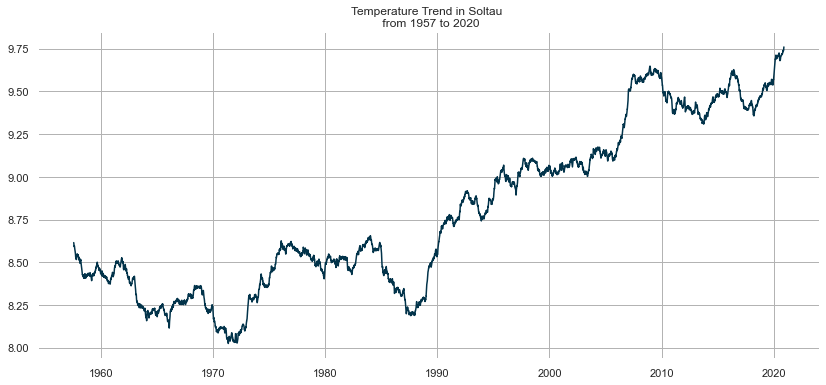

In [138]:
plt.figure(figsize = (14,6))

plt.plot(df['Temperature'].rolling(window = 3652).mean()) # average temperature value over 10 years

plt.title('Temperature Trend in Soltau \n from 1957 to 2020')
plt.show()

One can observe, that there are  increasing temperature trends.

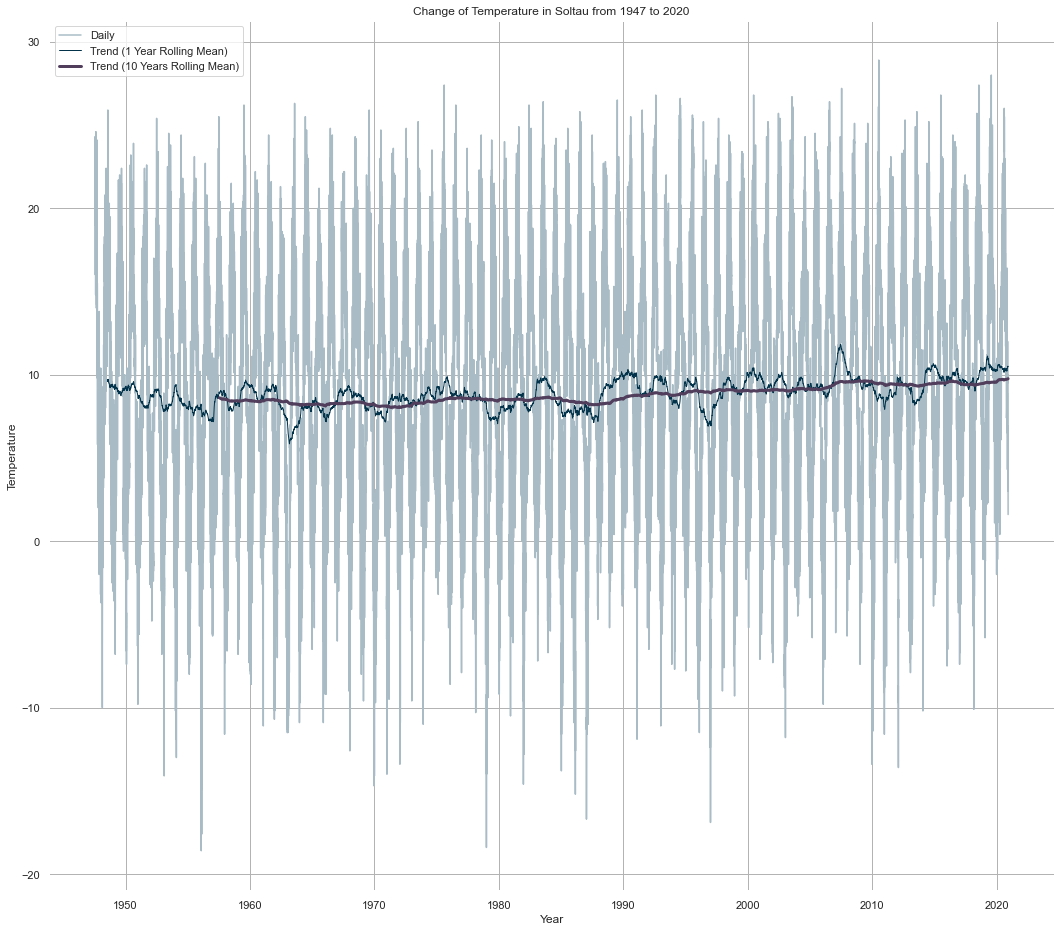

In [139]:
fig, ax = plt.subplots(figsize = (18,16))

ax.plot(df['Temperature'], color='#a9bcc6', label='Daily')
ax.plot(df['Temperature'].rolling(window = 365).mean(), color='#02334a', linewidth=1, label='Trend (1 Year Rolling Mean)')
ax.plot(df['Temperature'].rolling(window = 3652).mean(), color = '#513e5c', linewidth=3,label='Trend (10 Years Rolling Mean)')
ax.legend()

ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.set_title('Change of Temperature in Soltau from 1947 to 2020',)
plt.show()

#### Comparing of data from the 1960s and the 2010s.

In [141]:
df['Month'] = df['Date'].dt.month  # build 'Month' column


/opt/miniconda3/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
""" Build two dataframes:  The decade spanning 1960 to 1970
and The decade spanning 2010 to 2020 """

df_60 = df.loc['1960-08-30':'1970-08-30']

df_10 = df.loc['2010-08-30':'2020-08-30']

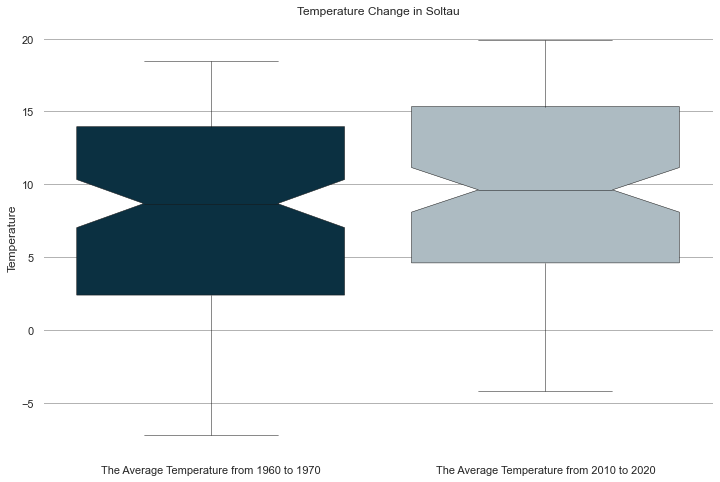

In [142]:
plt.figure(figsize = (12,8))
a = df_60['Temperature'].resample('M').mean() 
b = df_10['Temperature'].resample('M').mean()
data = (a,b)
sns.boxplot(data=data, linewidth=0.5,  notch=True)

plt.title('Temperature Change in Soltau')
plt.xticks([0,1], ['The Average Temperature from 1960 to 1970', 'The Average Temperature from 2010 to 2020'])
plt.ylabel('Temperature')
plt.show()

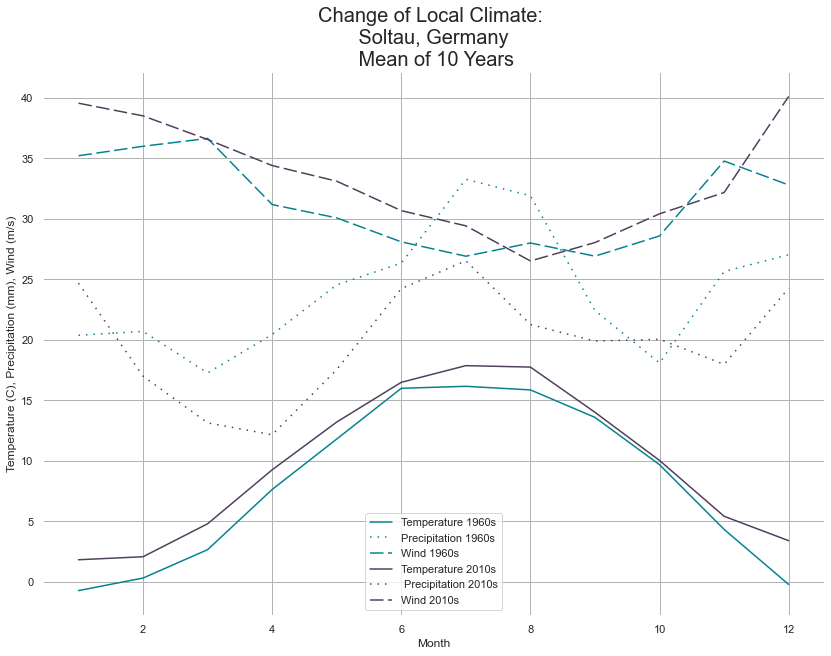

In [143]:
plt.figure(figsize = (14,10))

df_60.groupby(['Month'])['Temperature'].mean().plot(color = '#05828e')
df_60.groupby(['Month'])['Precipitation'].mean().plot(color = '#05828e', linestyle = ':', dashes=(1,4) )
df_60.groupby(['Month'])['Wind'].mean().plot(color = '#05828e', linestyle = '-',dashes=(9, 3) )

df_10.groupby(['Month'])['Temperature'].mean().plot(color = '#513e5c')
df_10.groupby(['Month'])['Precipitation'].mean().plot(color = '#513e5c', linestyle = ':', dashes=(1,4))
df_10.groupby(['Month'])['Wind'].mean().plot(color = '#513e5c', linestyle = '-',dashes=(9, 3))


plt.title('Change of Local Climate: \n Soltau, Germany \n Mean of 10 Years', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Temperature (C), Precipitation (mm), Wind (m/s)')
plt.legend(('Temperature 1960s', 'Precipitation 1960s', 'Wind 1960s', 'Temperature 2010s',' Precipitation 2010s', 'Wind 2010s' ),
           loc=0)
plt.show()

The graph shows that the average precipitation has decreased. I'll  look at the rainfall trend over the entire period.

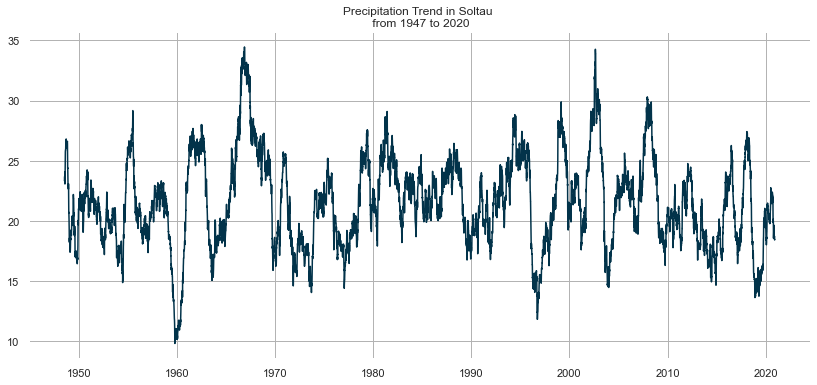

In [147]:
plt.figure(figsize = (14,6))

plt.plot(df['Precipitation'].rolling(window = 365).mean()) 

plt.title('Precipitation Trend in Soltau \n from 1947 to 2020')
plt.show()

We can see that it was in the 1960s  more precipitation than in 2010s, but what about trend? I want to compare data from two large time periods 

In [148]:
""" Build two dataframes:  two 3-decade periods """

df_50_80 = df.loc['1950-08-30':'1980-08-30']

df_90_20 = df.loc['1990-08-30':'2020-08-30']


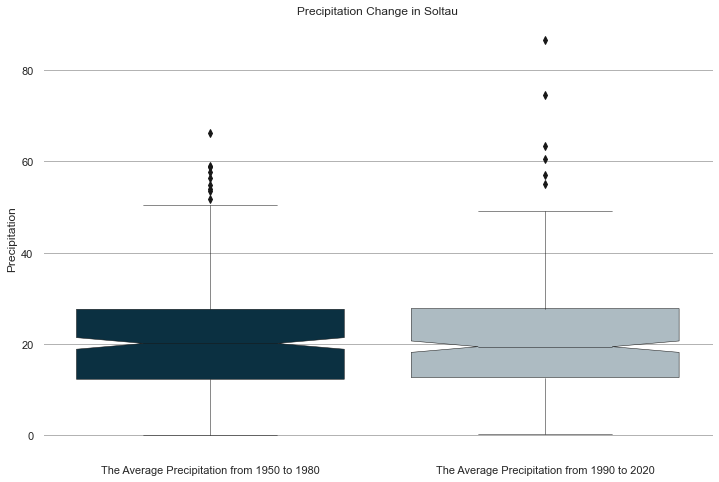

In [149]:
plt.figure(figsize = (12,8))
a = df_50_80['Precipitation'].resample('M').mean() 
b = df_90_20['Precipitation'].resample('M').mean()
data = (a,b)
sns.boxplot(data=data, linewidth=0.5,  notch=True)

plt.title('Precipitation Change in Soltau')
plt.xticks([0,1], ['The Average Precipitation from 1950 to 1980', 'The Average Precipitation from 1990 to 2020'])
plt.ylabel('Precipitation')
plt.show()

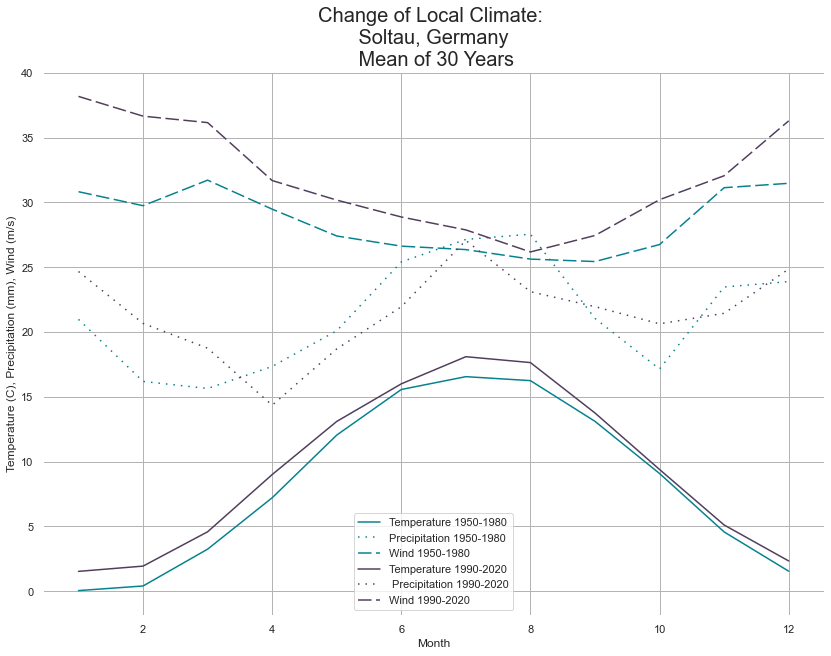

In [150]:
plt.figure(figsize = (14,10))

df_69.groupby(['Month'])['Temperature'].mean().plot(color = '#05828e')
df_69.groupby(['Month'])['Precipitation'].mean().plot(color = '#05828e', linestyle = ':', dashes=(1,4) )
df_69.groupby(['Month'])['Wind'].mean().plot(color = '#05828e', linestyle = '-',dashes=(9, 3) )

df_92.groupby(['Month'])['Temperature'].mean().plot(color = '#513e5c')
df_92.groupby(['Month'])['Precipitation'].mean().plot(color = '#513e5c', linestyle = ':', dashes=(1,4))
df_92.groupby(['Month'])['Wind'].mean().plot(color = '#513e5c', linestyle = '-',dashes=(9, 3))


plt.title('Change of Local Climate: \n Soltau, Germany \n Mean of 30 Years', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Temperature (C), Precipitation (mm), Wind (m/s)')
plt.legend(('Temperature 1950-1980', 'Precipitation 1950-1980', 'Wind 1950-1980', 'Temperature 1990-2020',' Precipitation 1990-2020', 'Wind 1990-2020' ),
           loc=0)
plt.show()

We can see that there are no significant changes in the amount of precipitation but
the wind has become stronger on average and temperatures have definitely been higher over the past 30 years.